# Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [4]:
import pandas as pd

# memuat dataset dan menampilkan 5 baris pertama
# URL dataset disesuaikan dengan mengganti spasi (' ') menjadi '%20'
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [5]:
# describe data
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


In [6]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


# Data Transformation

In [7]:
from sklearn.preprocessing import LabelEncoder

# Encoding Education (mengubah 'Education' menjadi angka)
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [32]:
from sklearn.preprocessing import StandardScaler

# 1. Membuat dataset unscaled (ini adalah df kita saat ini)
# Kita buat salinan untuk memastikan
df_unscaled = df.copy()

# 2. Membuat dataset scaled
# Simpan nama-nama kolom
columns_to_scale = df_unscaled.columns

# Create a StandardScaler object
sc = StandardScaler()

# Fit and transform semua kolom
df_scaled_array = sc.fit_transform(df_unscaled[columns_to_scale])

# Mengubah kembali menjadi DataFrame dengan nama kolom yang benar
df_scaled = pd.DataFrame(df_scaled_array, columns=columns_to_scale)

print("--- Data Unscaled (Original) ---")
df_unscaled.head()
print("\n--- Data Scaled ---")
df_scaled.head()

--- Data Unscaled (Original) ---

--- Data Scaled ---


,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Cluster_Scaled,Cluster_Unscaled,Agglo
0,0.179150,1.303097,-1.291519,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-1.421875,-0.992013,-0.044766,-0.960769,-0.044766
1,0.749977,1.533191,-0.389620,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,-0.512748,0.186427,-0.044766,-0.960769,-0.044766
2,0.364249,0.459420,-0.389620,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,0.396379,1.184595,-0.044766,-0.960769,-0.044766
3,0.165665,0.152629,-0.389620,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,1.305506,-1.274907,-0.044766,-0.960769,-0.044766
4,-0.250263,-0.307558,-1.291519,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.305506,1.684898,-0.044766,1.040833,-0.044766


In [9]:
# get stastical information on the new dataset
df_scaled.describe()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,2.158274e-16,1.421085e-16,5.151435e-17,2.593481e-16,1.598721e-16,9.237056e-17,-3.392842e-16,-1.918465e-16,4.085621e-17,1.492140e-16,-4.973799e-17,-8.171241e-17
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-1.687691e+00,-1.688120e+00,-1.291519e+00,-1.666120e+00,-1.905592e+00,-1.653782e+00,-1.716418e+00,-1.706699e+00,-1.723224e+00,-1.811333e+00,-1.421875e+00,-1.676552e+00
25%,-8.535233e-01,-8.444436e-01,-1.291519e+00,-8.739031e-01,-7.396169e-01,-8.179404e-01,-8.547889e-01,-8.524396e-01,-8.660940e-01,-8.511311e-01,-5.127476e-01,-8.654451e-01
50%,-3.347132e-02,-7.746485e-02,-3.896201e-01,-1.881200e-02,3.769986e-02,-1.692579e-02,-3.416637e-02,8.970695e-03,1.912909e-02,6.587104e-02,3.963794e-01,-3.124291e-02
75%,8.033504e-01,8.429096e-01,5.122783e-01,7.985545e-01,8.150166e-01,8.189156e-01,8.593735e-01,9.102263e-01,8.839671e-01,8.868705e-01,1.305506e+00,8.997453e-01
max,1.723192e+00,1.839982e+00,1.414177e+00,1.785682e+00,1.592333e+00,1.759237e+00,1.683474e+00,1.725528e+00,1.681174e+00,1.702529e+00,1.305506e+00,1.717971e+00


## Silhouette Score

Skor Silhouette (Scaled): [np.float64(0.046725955826425254), np.float64(0.03623142990917391), np.float64(0.027532936058590102), np.float64(0.028818453565234776), np.float64(0.026845955911644324), np.float64(0.028911051362347055), np.float64(0.028989383958726515), np.float64(0.031033767203840427), np.float64(0.032767048961639345)]
Skor Silhouette (Unscaled): [np.float64(0.39572706950108294), np.float64(0.34057138502302314), np.float64(0.28685909147411726), np.float64(0.2621776356192413), np.float64(0.24196061464152588), np.float64(0.24434419251872538), np.float64(0.2530369719956556), np.float64(0.2528384528125768), np.float64(0.24134818732073132)]


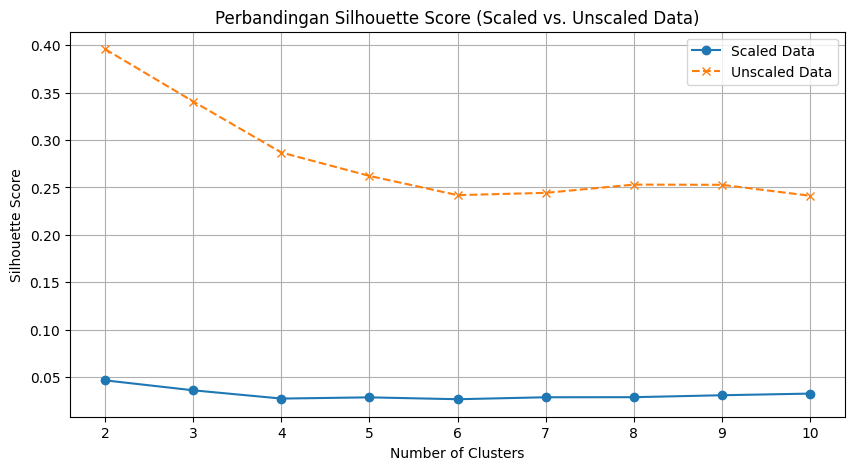

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# --- 1. Analisis Silhouette untuk Data SCALED ---
silhouette_scores_scaled = []
n_clusters_range = range(2, 11) # Kita akan menguji 2 sampai 10 clusters

for i in n_clusters_range:
    # Menggunakan linkage='ward' yang merupakan metode standar dan robust
    # 'ward' meminimalkan varians dari cluster yang digabungkan.
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='ward')
    cluster_labels = agglo_model.fit_predict(df_scaled)

    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores_scaled.append(silhouette_avg)

print("Skor Silhouette (Scaled):", silhouette_scores_scaled)


# --- 2. Analisis Silhouette untuk Data UNSCALED ---
silhouette_scores_unscaled = []

for i in n_clusters_range:
    agglo_model_unscaled = AgglomerativeClustering(n_clusters=i, linkage='ward')
    cluster_labels_unscaled = agglo_model_unscaled.fit_predict(df_unscaled)

    silhouette_avg_unscaled = silhouette_score(df_unscaled, cluster_labels_unscaled)
    silhouette_scores_unscaled.append(silhouette_avg_unscaled)

print("Skor Silhouette (Unscaled):", silhouette_scores_unscaled)


# --- 3. Plot Perbandingan ---
# Membuat plot untuk membandingkan hasilnya
plt.figure(figsize=(10, 5))

# Plot untuk data scaled
plt.plot(n_clusters_range, silhouette_scores_scaled, marker='o', label='Scaled Data')

# Plot untuk data unscaled
plt.plot(n_clusters_range, silhouette_scores_unscaled, marker='x', linestyle='--', label='Unscaled Data')

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Perbandingan Silhouette Score (Scaled vs. Unscaled Data)")
plt.legend()
plt.grid(True)
plt.show()

## Comparing Silhouette Score to get best combination of linkage and metric


--- Memulai Analisis untuk Data: Scaled Data ---


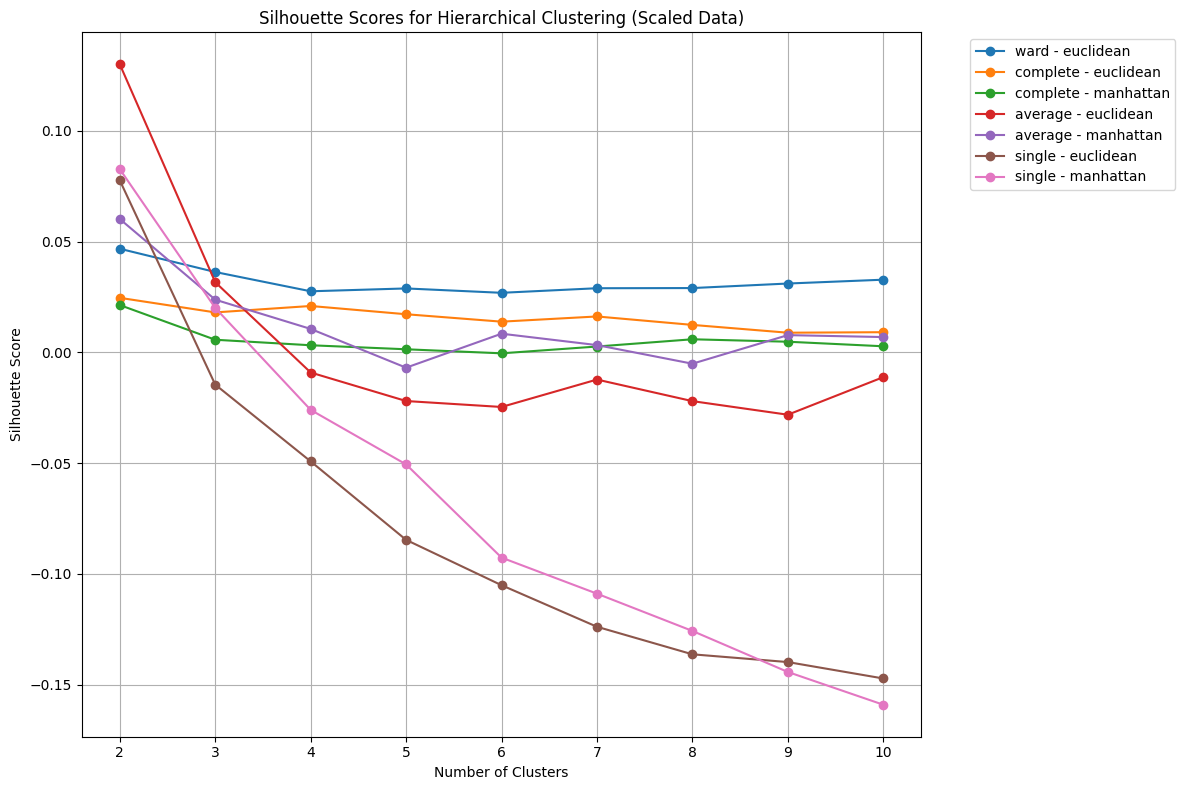

--- Hasil Terbaik untuk Scaled Data ---
Best Silhouette Score: 0.1300
Optimal Number of Clusters: 2
Optimal Linkage Method: average
Optimal Metric: euclidean
--------------------------------------

--- Memulai Analisis untuk Data: Unscaled Data ---


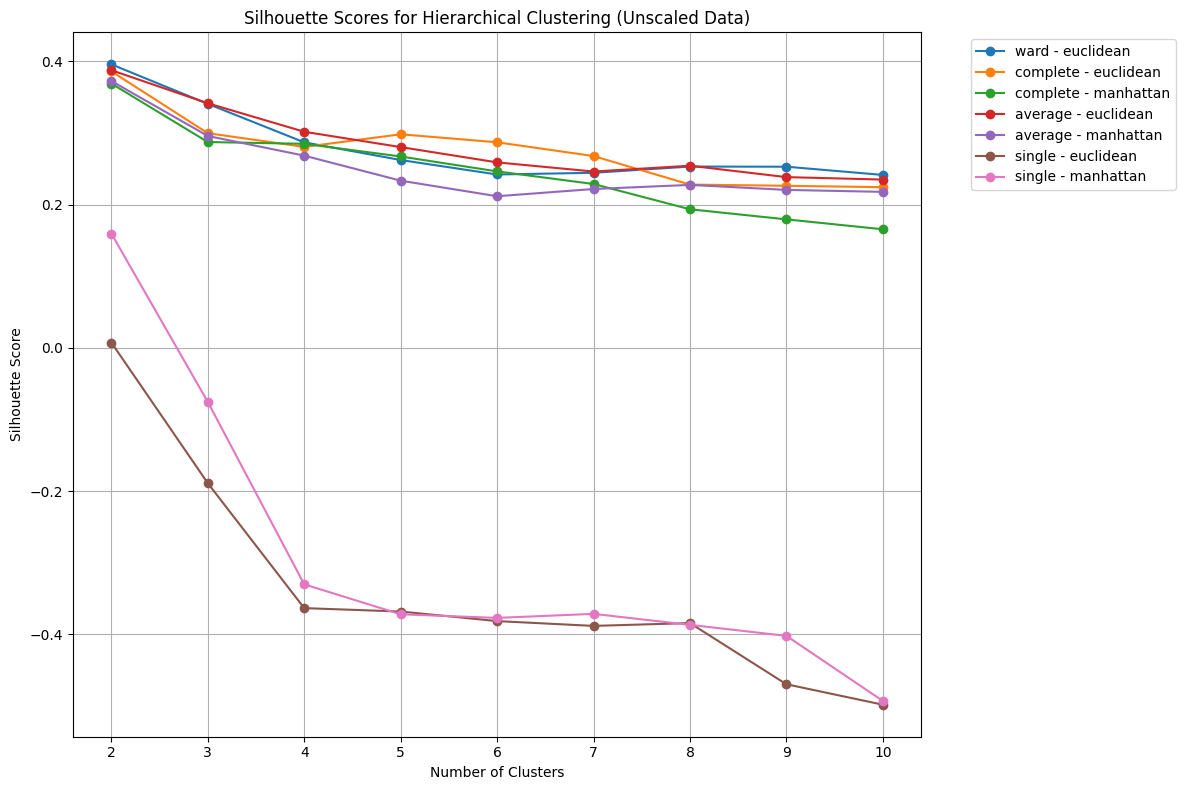

--- Hasil Terbaik untuk Unscaled Data ---
Best Silhouette Score: 0.3957
Optimal Number of Clusters: 2
Optimal Linkage Method: ward
Optimal Metric: euclidean
--------------------------------------


===== RINGKASAN PERBANDINGAN AKHIR =====
Model Terbaik (Scaled):
  Score: 0.1300
  Params: 2 clusters, linkage='average', metric='euclidean'


Model Terbaik (Unscaled):
  Score: 0.3957
  Params: 2 clusters, linkage='ward', metric='euclidean'


In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# --- 1. Definisikan Fungsi Grid Search ---
# Kita buat fungsi agar bisa dipakai ulang untuk df_scaled dan df_unscaled

def find_best_hierarchical_model(data, data_label):
    """
    Melakukan grid search untuk AgglomerativeClustering pada data
    dan mem-plot hasilnya.
    """
    print(f"\n--- Memulai Analisis untuk Data: {data_label} ---")

    range_n_clusters = range(2, 11)
    linkage_methods = ['ward', 'complete', 'average', 'single']
    # 'ward' hanya support 'euclidean', jadi kita akan menanganinya

    best_silhouette_score = -1
    best_n_clusters = 0
    best_linkage = ''
    best_metric = ''

    results_for_plotting = []

    for linkage_method in linkage_methods:

        # Tentukan metrik yang akan diuji berdasarkan linkage
        if linkage_method == 'ward':
            metrics_to_test = ['euclidean'] # ward hanya support euclidean
        else:
            metrics_to_test = ['euclidean', 'manhattan'] # Coba kedua metrik untuk linkage lain

        for metric in metrics_to_test:

            current_scores = []
            for n_clusters in range_n_clusters:
                agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)

                # Cek jika data memiliki nilai NaN (bisa terjadi pada unscaled data jika ada 'inf')
                if not np.isfinite(data).all().all():
                    print(f"Skipping {linkage_method} - {metric} karena ada nilai non-finite.")
                    continue

                y_agglo = agglo.fit_predict(data)
                silhouette_avg = silhouette_score(data, y_agglo)
                current_scores.append(silhouette_avg)

                if silhouette_avg > best_silhouette_score:
                    best_silhouette_score = silhouette_avg
                    best_n_clusters = n_clusters
                    best_linkage = linkage_method
                    best_metric = metric

            results_for_plotting.append({
                'linkage': linkage_method,
                'metric': metric,
                'scores': current_scores
            })

    # --- Plotting hasil untuk data ini ---
    plt.figure(figsize=(12, 8))
    for result in results_for_plotting:
        plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.title(f"Silhouette Scores for Hierarchical Clustering ({data_label})")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"--- Hasil Terbaik untuk {data_label} ---")
    print(f"Best Silhouette Score: {best_silhouette_score:.4f}")
    print(f"Optimal Number of Clusters: {best_n_clusters}")
    print(f"Optimal Linkage Method: {best_linkage}")
    print(f"Optimal Metric: {best_metric}")
    print("--------------------------------------")

    # Mengembalikan hasil terbaik untuk perbandingan akhir
    return {
        'data_label': data_label,
        'score': best_silhouette_score,
        'clusters': best_n_clusters,
        'linkage': best_linkage,
        'metric': best_metric
    }

# --- 2. Jalankan Analisis pada Kedua Dataset ---

# Jalankan pada Data SCALED (df_scaled)
best_scaled_result = find_best_hierarchical_model(df_scaled, "Scaled Data")

# Jalankan pada Data UNSCALED (df_unscaled)
best_unscaled_result = find_best_hierarchical_model(df_unscaled, "Unscaled Data")

# --- 3. Tampilkan Ringkasan Perbandingan Akhir ---

print("\n\n===== RINGKASAN PERBANDINGAN AKHIR =====")
print(f"Model Terbaik (Scaled):")
print(f"  Score: {best_scaled_result['score']:.4f}")
print(f"  Params: {best_scaled_result['clusters']} clusters, linkage='{best_scaled_result['linkage']}', metric='{best_scaled_result['metric']}'")
print("\n")
print(f"Model Terbaik (Unscaled):")
print(f"  Score: {best_unscaled_result['score']:.4f}")
print(f"  Params: {best_unscaled_result['clusters']} clusters, linkage='{best_unscaled_result['linkage']}', metric='{best_unscaled_result['metric']}'")
print("========================================")

## Dendogram Visualization

--- Menampilkan Dendrogram untuk Data SCALED ---


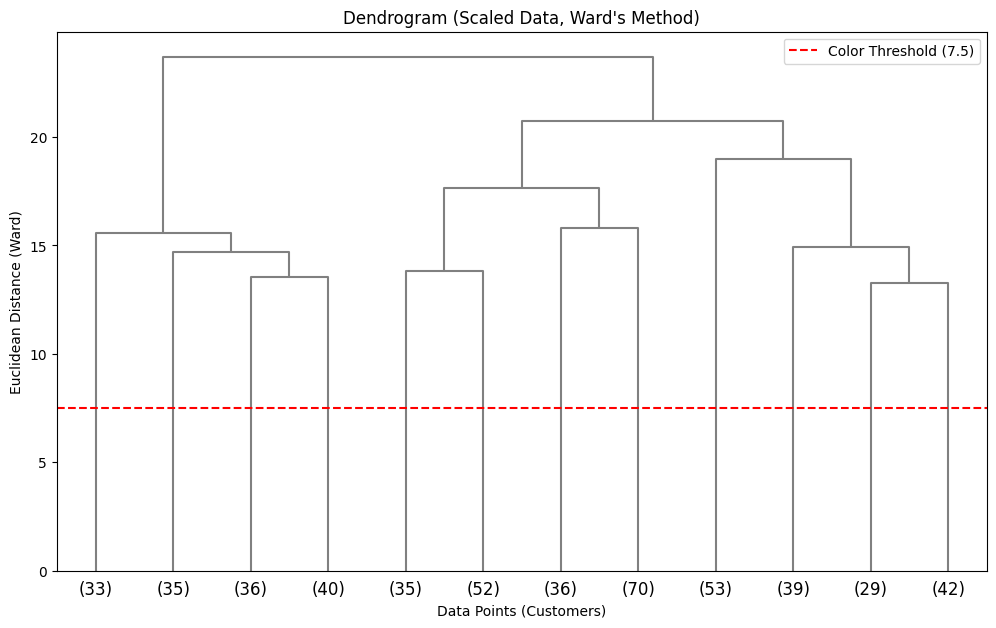


--- Menampilkan Dendrogram untuk Data UNSCALED ---


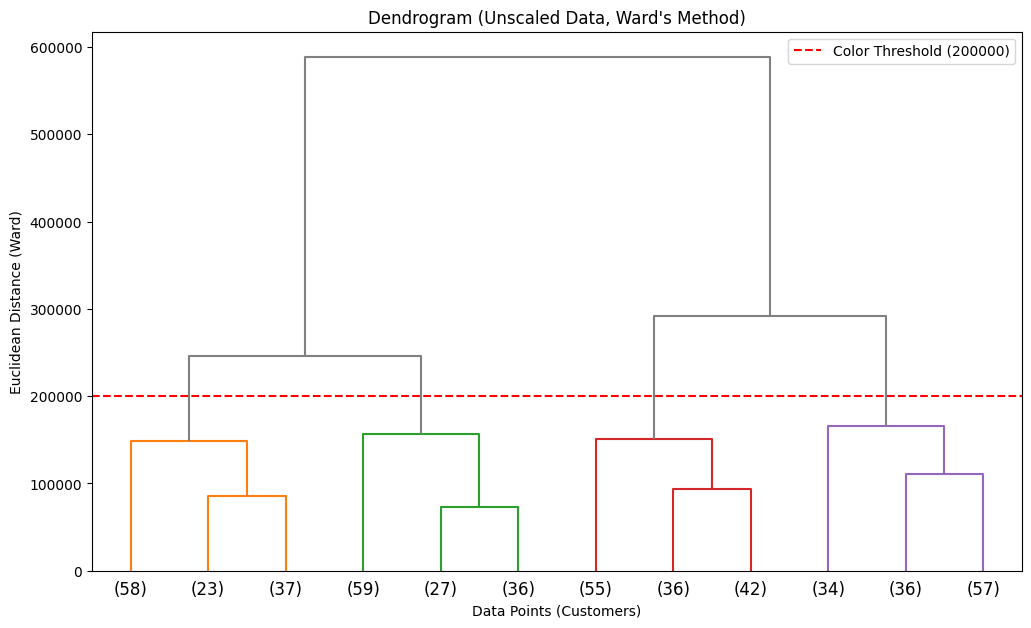

In [12]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

# --- 1. Dendrogram untuk Data SCALED ---
# (Ini adalah kode Anda, disesuaikan agar berjalan)

print("--- Menampilkan Dendrogram untuk Data SCALED ---")

# Menghitung linkage matrix menggunakan method 'ward' dan metric 'euclidean'
linked_scaled = linkage(df_scaled, method='ward', metric='euclidean')

# Tentukan color_threshold (garis horizontal di mana cluster dipotong)
# Nilai 7.5 dari kode Anda mungkin sudah bagus, mari kita coba
threshold_scaled = 7.5

# Plot dendrogram
plt.figure(figsize=(12, 7))
sch.dendrogram(linked_scaled,
               above_threshold_color="grey",   # Warna untuk link di atas threshold
               color_threshold=threshold_scaled, # Memotong di 7.5
               truncate_mode='lastp',  # Menampilkan 'p' cluster terakhir
               p=12)                   # Jumlah cluster 'p' yang ditampilkan di bawah

plt.title("Dendrogram (Scaled Data, Ward's Method)")
plt.xlabel("Data Points (Customers)")
plt.ylabel("Euclidean Distance (Ward)")
plt.axhline(y=threshold_scaled, color='r', linestyle='--', label=f'Color Threshold ({threshold_scaled})')
plt.legend()
plt.show()


# --- 2. Dendrogram untuk Data UNSCALED ---
# (Sangat penting untuk perbandingan di Bagian D)

print("\n--- Menampilkan Dendrogram untuk Data UNSCALED ---")

# Menghitung linkage matrix
linked_unscaled = linkage(df_unscaled, method='ward', metric='euclidean')

# Tentukan color_threshold (perlu JAUH lebih besar karena datanya tidak di-scale)
# Nilai `Income` dan `Balance` sangat besar, jadi jaraknya juga akan besar
# Mari kita coba threshold di 200000 sebagai awal
threshold_unscaled = 200000

# Plot dendrogram
plt.figure(figsize=(12, 7))
sch.dendrogram(linked_unscaled,
               above_threshold_color="grey",
               color_threshold=threshold_unscaled,
               truncate_mode='lastp',
               p=12)
plt.title("Dendrogram (Unscaled Data, Ward's Method)")
plt.xlabel("Data Points (Customers)")
plt.ylabel("Euclidean Distance (Ward)")
plt.axhline(y=threshold_unscaled, color='r', linestyle='--', label=f'Color Threshold ({threshold_unscaled})')
plt.legend()
plt.show()

--- Menampilkan Dendrogram (Complete Linkage) untuk Data SCALED ---


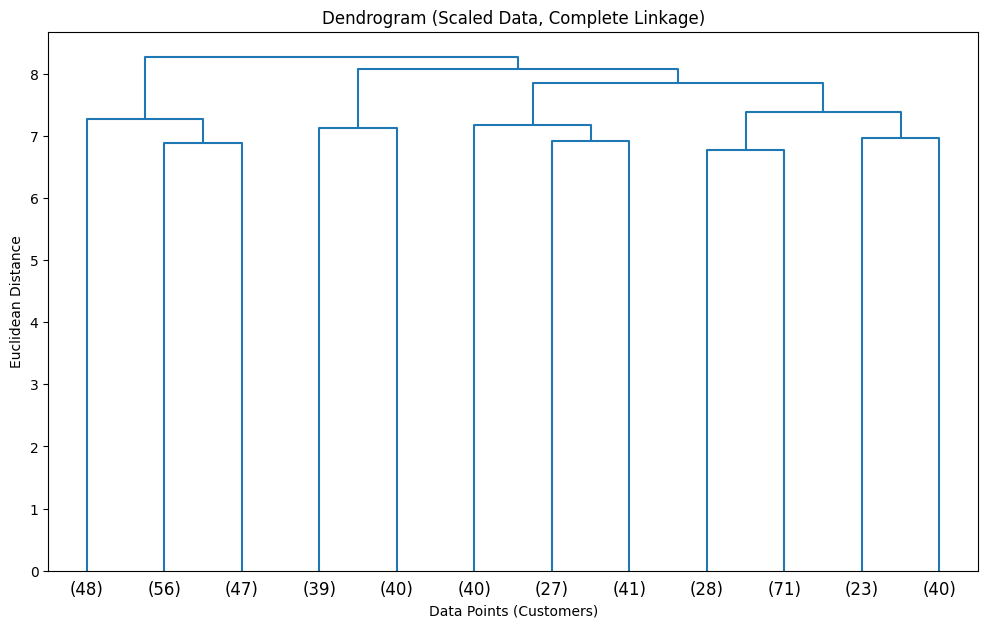


--- Menampilkan Dendrogram (Complete Linkage) untuk Data UNSCALED ---


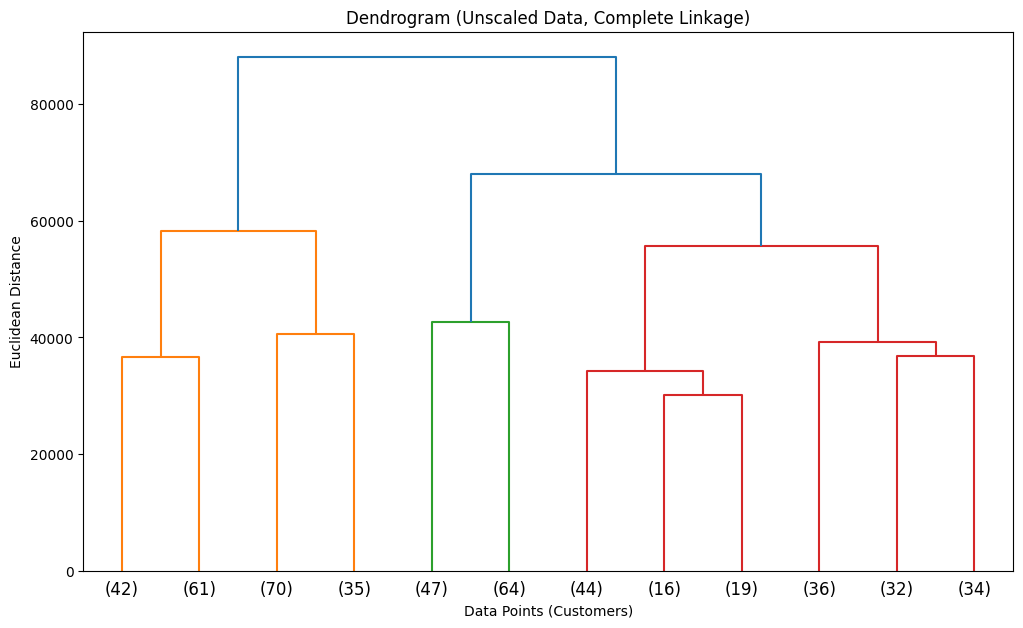

In [13]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

# --- 1. Dendrogram "Complete Linkage" untuk Data SCALED ---
# (Ini adalah kode Anda, sedikit disesuaikan untuk keterbacaan)

print("--- Menampilkan Dendrogram (Complete Linkage) untuk Data SCALED ---")

# Menghitung linkage matrix
linked_scaled_complete = linkage(df_scaled, method='complete', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(12, 7))
sch.dendrogram(linked_scaled_complete,
               truncate_mode='lastp',  # Menampilkan 'p' cluster terakhir
               p=12)                   # agar lebih mudah dibaca

plt.title("Dendrogram (Scaled Data, Complete Linkage)")
plt.xlabel("Data Points (Customers)")
plt.ylabel("Euclidean Distance")
plt.show()


# --- 2. Dendrogram "Complete Linkage" untuk Data UNSCALED ---
# (Ini adalah bagian perbandingan yang penting untuk tugas Anda)

print("\n--- Menampilkan Dendrogram (Complete Linkage) untuk Data UNSCALED ---")

# Menghitung linkage matrix
linked_unscaled_complete = linkage(df_unscaled, method='complete', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(12, 7))
sch.dendrogram(linked_unscaled_complete,
               truncate_mode='lastp',
               p=12)

plt.title("Dendrogram (Unscaled Data, Complete Linkage)")
plt.xlabel("Data Points (Customers)")
plt.ylabel("Euclidean Distance")
plt.show()

--- Menampilkan Dendrogram (Single Linkage) untuk Data SCALED ---


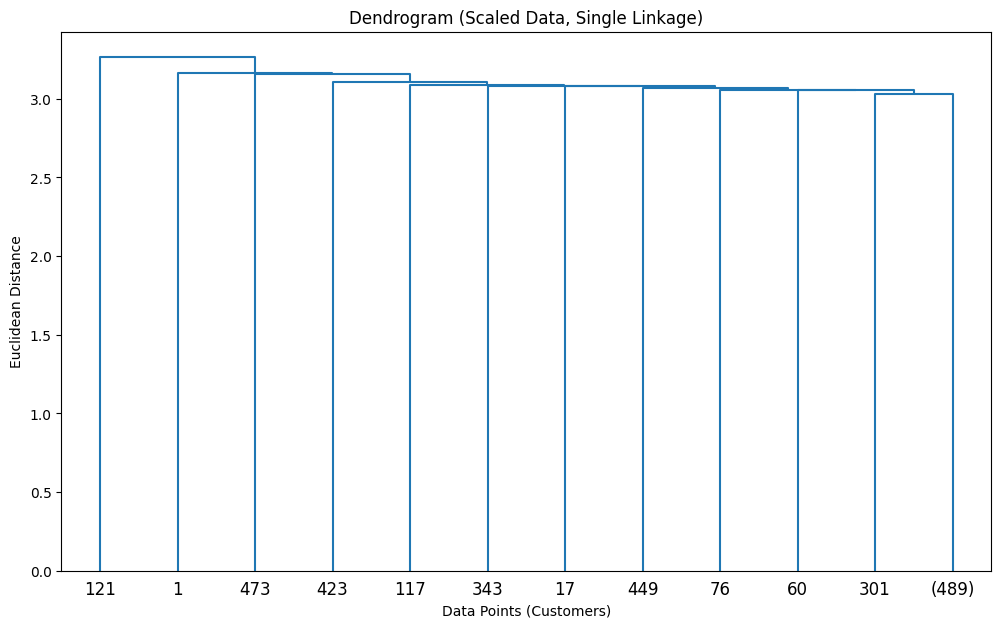


--- Menampilkan Dendrogram (Single Linkage) untuk Data UNSCALED ---


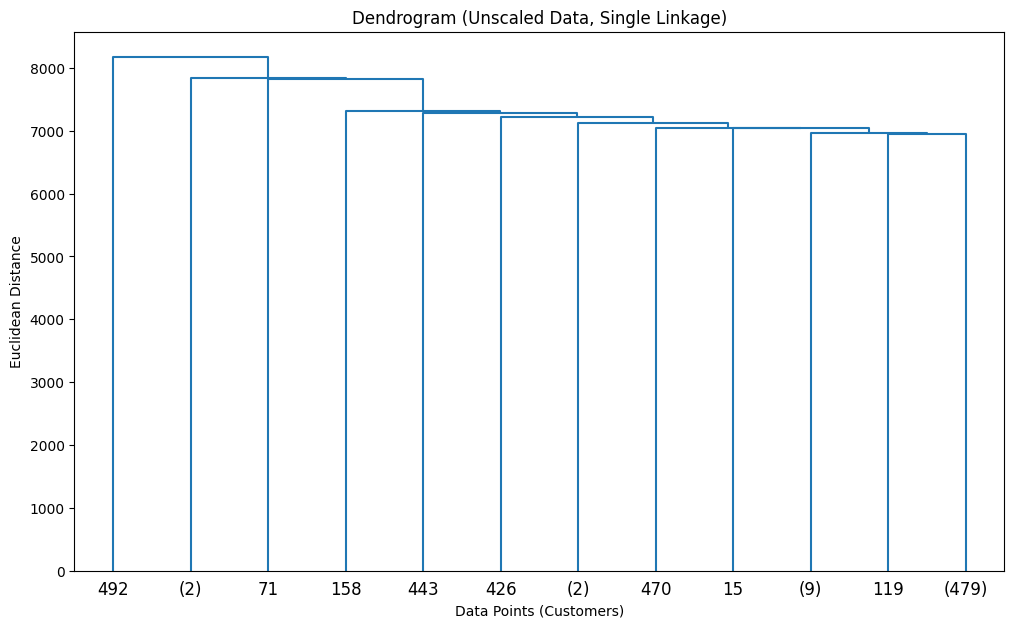

In [14]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

# --- 1. Dendrogram "Single Linkage" untuk Data SCALED ---
# (Ini adalah kode Anda, disesuaikan untuk keterbacaan)

print("--- Menampilkan Dendrogram (Single Linkage) untuk Data SCALED ---")

# Menghitung linkage matrix
linked_scaled_single = linkage(df_scaled, method='single', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(12, 7))
sch.dendrogram(linked_scaled_single,
               truncate_mode='lastp',  # Menampilkan 'p' cluster terakhir
               p=12)                   # agar lebih mudah dibaca

plt.title("Dendrogram (Scaled Data, Single Linkage)")
plt.xlabel("Data Points (Customers)")
plt.ylabel("Euclidean Distance")
plt.show()


# --- 2. Dendrogram "Single Linkage" untuk Data UNSCALED ---
# (Bagian perbandingan untuk Bagian D)

print("\n--- Menampilkan Dendrogram (Single Linkage) untuk Data UNSCALED ---")

# Menghitung linkage matrix
linked_unscaled_single = linkage(df_unscaled, method='single', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(12, 7))
sch.dendrogram(linked_unscaled_single,
               truncate_mode='lastp',
               p=12)

plt.title("Dendrogram (Unscaled Data, Single Linkage)")
plt.xlabel("Data Points (Customers)")
plt.ylabel("Euclidean Distance")
plt.show()

--- Menampilkan Dendrogram (Average Linkage) untuk Data SCALED ---


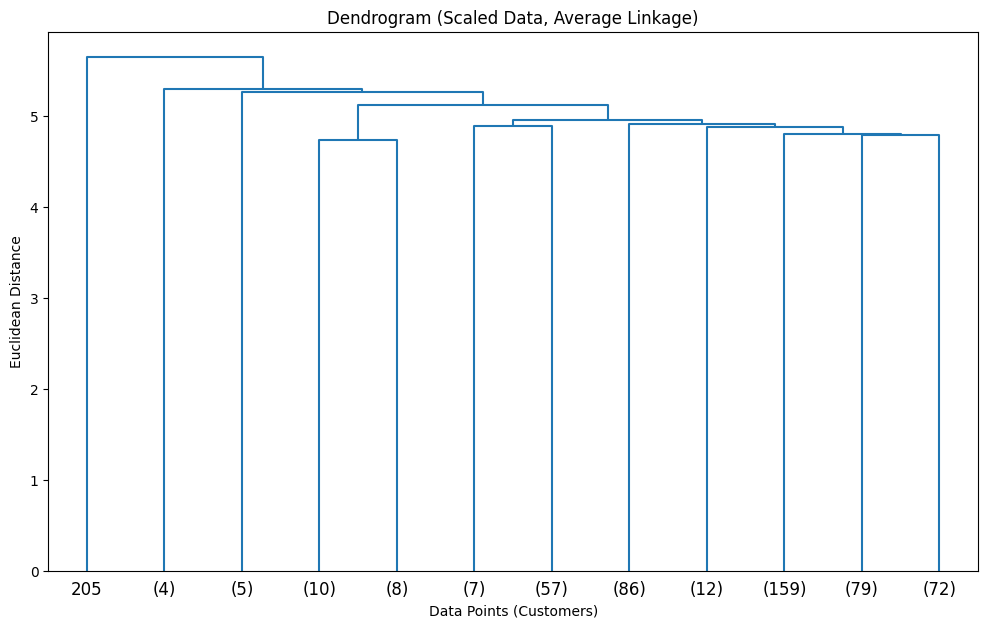


--- Menampilkan Dendrogram (Average Linkage) untuk Data UNSCALED ---


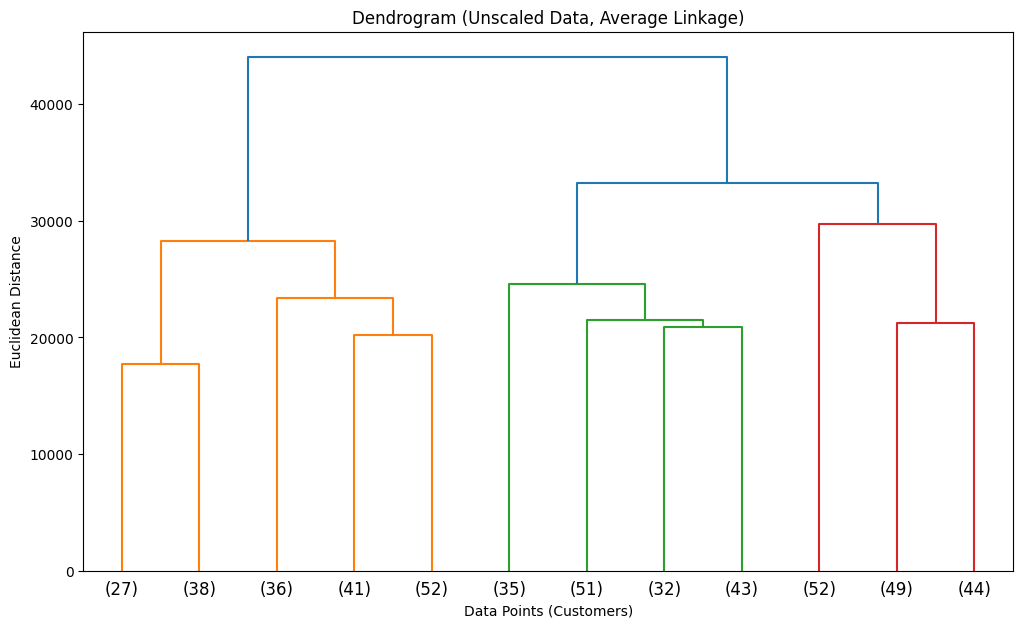

In [15]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

# --- 1. Dendrogram "Average Linkage" untuk Data SCALED ---
# (Ini adalah kode Anda, disesuaikan untuk keterbacaan)

print("--- Menampilkan Dendrogram (Average Linkage) untuk Data SCALED ---")

# Menghitung linkage matrix
linked_scaled_average = linkage(df_scaled, method='average', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(12, 7))
sch.dendrogram(linked_scaled_average,
               truncate_mode='lastp',  # Menampilkan 'p' cluster terakhir
               p=12)                   # agar lebih mudah dibaca

plt.title("Dendrogram (Scaled Data, Average Linkage)")
plt.xlabel("Data Points (Customers)")
plt.ylabel("Euclidean Distance")
plt.show()


# --- 2. Dendrogram "Average Linkage" untuk Data UNSCALED ---
# (Bagian perbandingan untuk Bagian D)

print("\n--- Menampilkan Dendrogram (Average Linkage) untuk Data UNSCALED ---")

# Menghitung linkage matrix
linked_unscaled_average = linkage(df_unscaled, method='average', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(12, 7))
sch.dendrogram(linked_unscaled_average,
               truncate_mode='lastp',
               p=12)

plt.title("Dendrogram (Unscaled Data, Average Linkage)")
plt.xlabel("Data Points (Customers)")
plt.ylabel("Euclidean Distance")
plt.show()

## Hierarchical Clustering Model

In [17]:
from sklearn.cluster import AgglomerativeClustering

# --- 1. Membangun Model Final (SCALED) ---
# Menggunakan parameter terbaik dari grid search data scaled
print("--- Membangun Model Final untuk Data SCALED ---")
params_scaled = best_scaled_result # Mengambil hasil dari kode sebelumnya

agglo_scaled = AgglomerativeClustering(
    n_clusters=params_scaled['clusters'],
    linkage=params_scaled['linkage'],
    metric=params_scaled['metric']
)
y_hc_scaled = agglo_scaled.fit_predict(df_scaled)

# Menambahkan label cluster ke DataFrame
df_scaled['Cluster'] = y_hc_scaled
# Kita juga tambahkan ke df original untuk interpretasi nanti (Bagian D)
df['Cluster_Scaled'] = y_hc_scaled

print(f"Model Scaled dibuat dengan {params_scaled['clusters']} clusters, linkage='{params_scaled['linkage']}', metric='{params_scaled['metric']}'")


# --- 2. Membangun Model Final (UNSCALED) ---
# Menggunakan parameter terbaik dari grid search data unscaled
print("\n--- Membangun Model Final untuk Data UNSCALED ---")
params_unscaled = best_unscaled_result # Mengambil hasil dari kode sebelumnya

agglo_unscaled = AgglomerativeClustering(
    n_clusters=params_unscaled['clusters'],
    linkage=params_unscaled['linkage'],
    metric=params_unscaled['metric']
)
y_hc_unscaled = agglo_unscaled.fit_predict(df_unscaled)

# Menambahkan label cluster ke DataFrame
df_unscaled['Cluster'] = y_hc_unscaled
# Kita juga tambahkan ke df original untuk interpretasi nanti (Bagian D)
df['Cluster_Unscaled'] = y_hc_unscaled

print(f"Model Unscaled dibuat dengan {params_unscaled['clusters']} clusters, linkage='{params_unscaled['linkage']}', metric='{params_unscaled['metric']}'")


# --- 3. Menampilkan df original dengan kedua label cluster ---
print("\n--- DataFrame Original (df) dengan Kedua Label Cluster ---")
print(df.head())

--- Membangun Model Final untuk Data SCALED ---
Model Scaled dibuat dengan 2 clusters, linkage='average', metric='euclidean'

--- Membangun Model Final untuk Data UNSCALED ---
Model Unscaled dibuat dengan 2 clusters, linkage='ward', metric='euclidean'

--- DataFrame Original (df) dengan Kedua Label Cluster ---
        Income  Age  Education  Credit_Score  Years_with_Bank  \
0  66161.01279   57          0           503                1   
1  78639.20248   60          1           779                2   
2  70207.25321   46          1           519               14   
3  65866.23872   42          1           834               17   
4  56774.10995   36          0           410               12   

   Transaction_Count      Balance  Loan_Approval_Amount  Credit_Card_Limit  \
0                 41  1968.919899           2517.159284        5813.342700   
1                 27  9797.056371          31501.758840        3991.007637   
2                 95  7024.173403          16444.341580        

In [18]:
from sklearn.metrics import silhouette_score

# --- 1. Evaluasi Model SCALED ---
# (Ini sesuai dengan kode Anda, 'y_hc' adalah 'y_hc_scaled' kita)
# Perhatikan: df_scaled['Cluster'] tidak boleh ikut dihitung, jadi kita drop
ss_scaled = silhouette_score(df_scaled.drop('Cluster', axis=1), y_hc_scaled)
print(f"Silhouette Score (Model SCALED): {ss_scaled:.4f}")

# --- 2. Evaluasi Model UNSCALED ---
# (Ini adalah bagian penting untuk perbandingan di Bagian D)
# Perhatikan: df_unscaled['Cluster'] tidak boleh ikut dihitung
ss_unscaled = silhouette_score(df_unscaled.drop('Cluster', axis=1), y_hc_unscaled)
print(f"Silhouette Score (Model UNSCALED): {ss_unscaled:.4f}")

# --- 3. Perbandingan Cepat ---
print("\n--- Perbandingan Skor ---")
if ss_scaled > ss_unscaled:
    print(f"Model SCALED memiliki skor lebih tinggi ({ss_scaled:.4f} > {ss_unscaled:.4f}).")
else:
    print(f"Model UNSCALED memiliki skor lebih tinggi ({ss_unscaled:.4f} > {ss_scaled:.4f}).")

Silhouette Score (Model SCALED): 0.1300
Silhouette Score (Model UNSCALED): 0.3957

--- Perbandingan Skor ---
Model UNSCALED memiliki skor lebih tinggi (0.3957 > 0.1300).


## Dendogram Visualization for Hierarchical Clustering Model

--- Plotting Dendrogram (Best Scaled Model: average - euclidean) ---


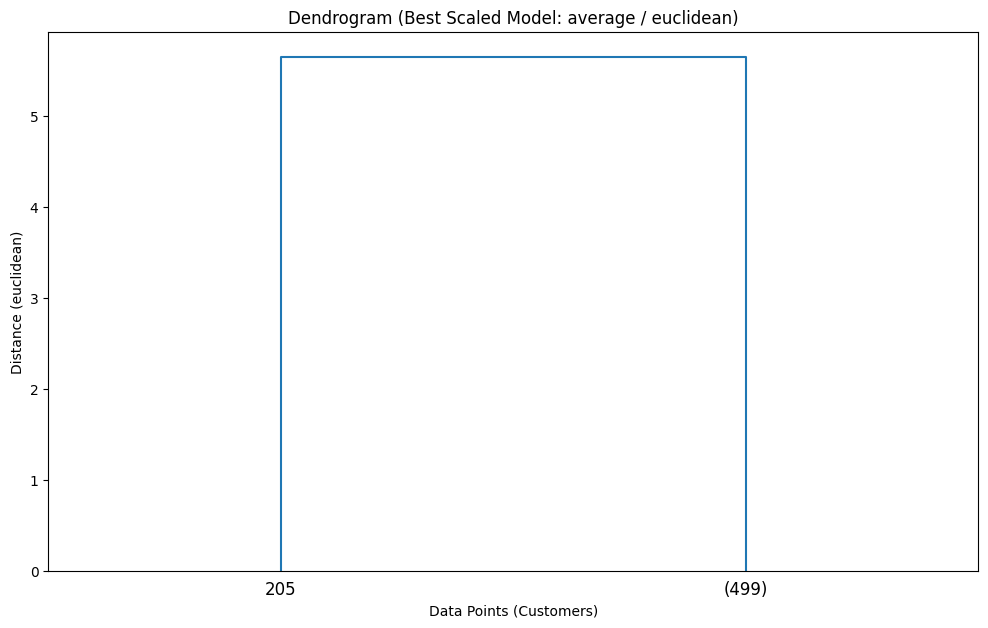


--- Plotting Dendrogram (Best Unscaled Model: ward - euclidean) ---


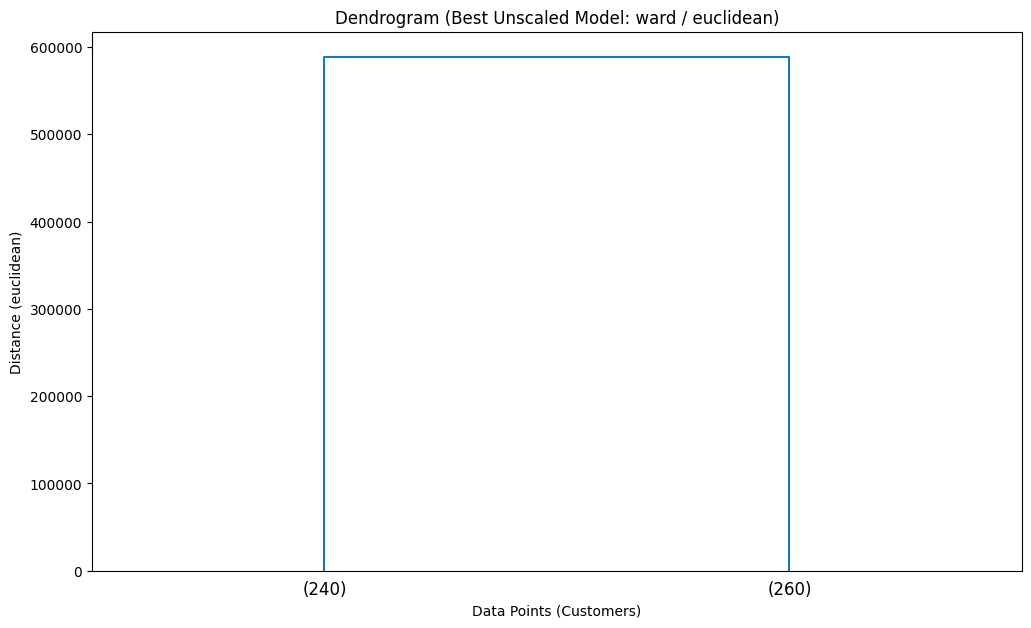

In [19]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

# --- 1. Dendrogram untuk Model SCALED Terbaik ---
# Mengambil parameter terbaik dari hasil grid search 'best_scaled_result'
params_scaled = best_scaled_result
linkage_scaled = params_scaled['linkage']
metric_scaled = params_scaled['metric']
n_clusters_scaled = params_scaled['clusters']

print(f"--- Plotting Dendrogram (Best Scaled Model: {linkage_scaled} - {metric_scaled}) ---")

# Menghitung linkage matrix
linked_scaled_best = linkage(df_scaled.drop('Cluster', axis=1, errors='ignore'),
                             method=linkage_scaled,
                             metric=metric_scaled)

# Plot dendrogram
plt.figure(figsize=(12, 7))
sch.dendrogram(linked_scaled_best,
               truncate_mode='lastp',  # Tampilkan 'p' cluster terakhir
               p=n_clusters_scaled)    # Gunakan jumlah cluster terbaik sebagai 'p'

plt.title(f"Dendrogram (Best Scaled Model: {linkage_scaled} / {metric_scaled})")
plt.xlabel("Data Points (Customers)")
plt.ylabel(f"Distance ({metric_scaled})")
plt.show()


# --- 2. Dendrogram untuk Model UNSCALED Terbaik ---
# Mengambil parameter terbaik dari hasil grid search 'best_unscaled_result'
params_unscaled = best_unscaled_result
linkage_unscaled = params_unscaled['linkage']
metric_unscaled = params_unscaled['metric']
n_clusters_unscaled = params_unscaled['clusters']

print(f"\n--- Plotting Dendrogram (Best Unscaled Model: {linkage_unscaled} - {metric_unscaled}) ---")

# Menghitung linkage matrix
linked_unscaled_best = linkage(df_unscaled.drop('Cluster', axis=1, errors='ignore'),
                               method=linkage_unscaled,
                               metric=metric_unscaled)

# Plot dendrogram
plt.figure(figsize=(12, 7))
sch.dendrogram(linked_unscaled_best,
               truncate_mode='lastp',
               p=n_clusters_unscaled)

plt.title(f"Dendrogram (Best Unscaled Model: {linkage_unscaled} / {metric_unscaled})")
plt.xlabel("Data Points (Customers)")
plt.ylabel(f"Distance ({metric_unscaled})")
plt.show()

## Merge with the original data

In [21]:
# Menambahkan label cluster (dari model SCALED terbaik) ke df original
# Variabel 'y_hc' Anda sesuai dengan 'y_hc_scaled' yang kita buat sebelumnya
df['Agglo'] = y_hc_scaled

# Menganalisis cluster dengan nilai original
# df.head() sekarang akan menampilkan kolom 'Agglo'
# (yang isinya sama dengan 'Cluster_Scaled' yang sudah kita buat)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Cluster_Scaled,Cluster_Unscaled,Agglo
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,0,0,0
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,0,0,0
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,0,0,0
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,0,0,0
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,0,1,0


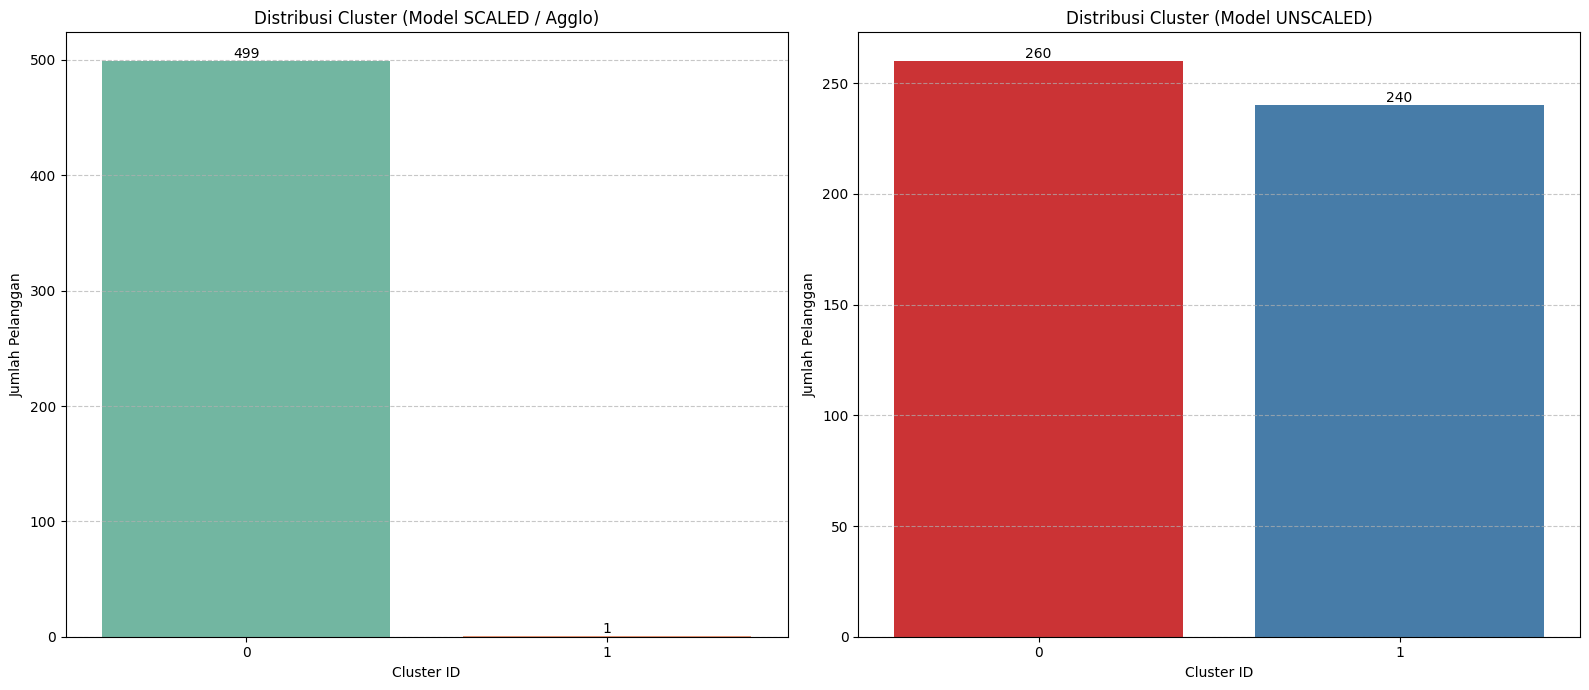

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Plot untuk Distribusi Cluster (Model SCALED / 'Agglo') ---
# (Ini adalah kode Anda, sedikit disesuaikan untuk subplot)

# Dapatkan jumlah data per cluster dari kolom 'Agglo' (hasil model scaled)
cluster_counts_scaled = df['Agglo'].value_counts().sort_index()

# Buat figur besar untuk 2 plot
plt.figure(figsize=(16, 7))

# Plot 1: Model Scaled
plt.subplot(1, 2, 1) # (1 baris, 2 kolom, plot ke-1)
ax_scaled = sns.barplot(x=cluster_counts_scaled.index,
                        y=cluster_counts_scaled.values,
                        hue=cluster_counts_scaled.index,
                        palette='Set2',
                        legend=False)

# Tambahkan label di atas bar
for container in ax_scaled.containers:
    ax_scaled.bar_label(container, fmt='%d', label_type='edge')

plt.title('Distribusi Cluster (Model SCALED / Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# --- 2. Plot untuk Distribusi Cluster (Model UNSCALED) ---
# (Ini adalah bagian perbandingan yang penting untuk Bagian D)

# Dapatkan jumlah data per cluster dari kolom 'Cluster_Unscaled'
cluster_counts_unscaled = df['Cluster_Unscaled'].value_counts().sort_index()

# Plot 2: Model Unscaled
plt.subplot(1, 2, 2) # (1 baris, 2 kolom, plot ke-2)
ax_unscaled = sns.barplot(x=cluster_counts_unscaled.index,
                          y=cluster_counts_unscaled.values,
                          hue=cluster_counts_unscaled.index,
                          palette='Set1', # Ganti palet agar beda
                          legend=False)

# Tambahkan label di atas bar
for container in ax_unscaled.containers:
    ax_unscaled.bar_label(container, fmt='%d', label_type='edge')

plt.title('Distribusi Cluster (Model UNSCALED)')
plt.xlabel('Cluster ID')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan kedua plot
plt.tight_layout() # Merapikan layout
plt.show()

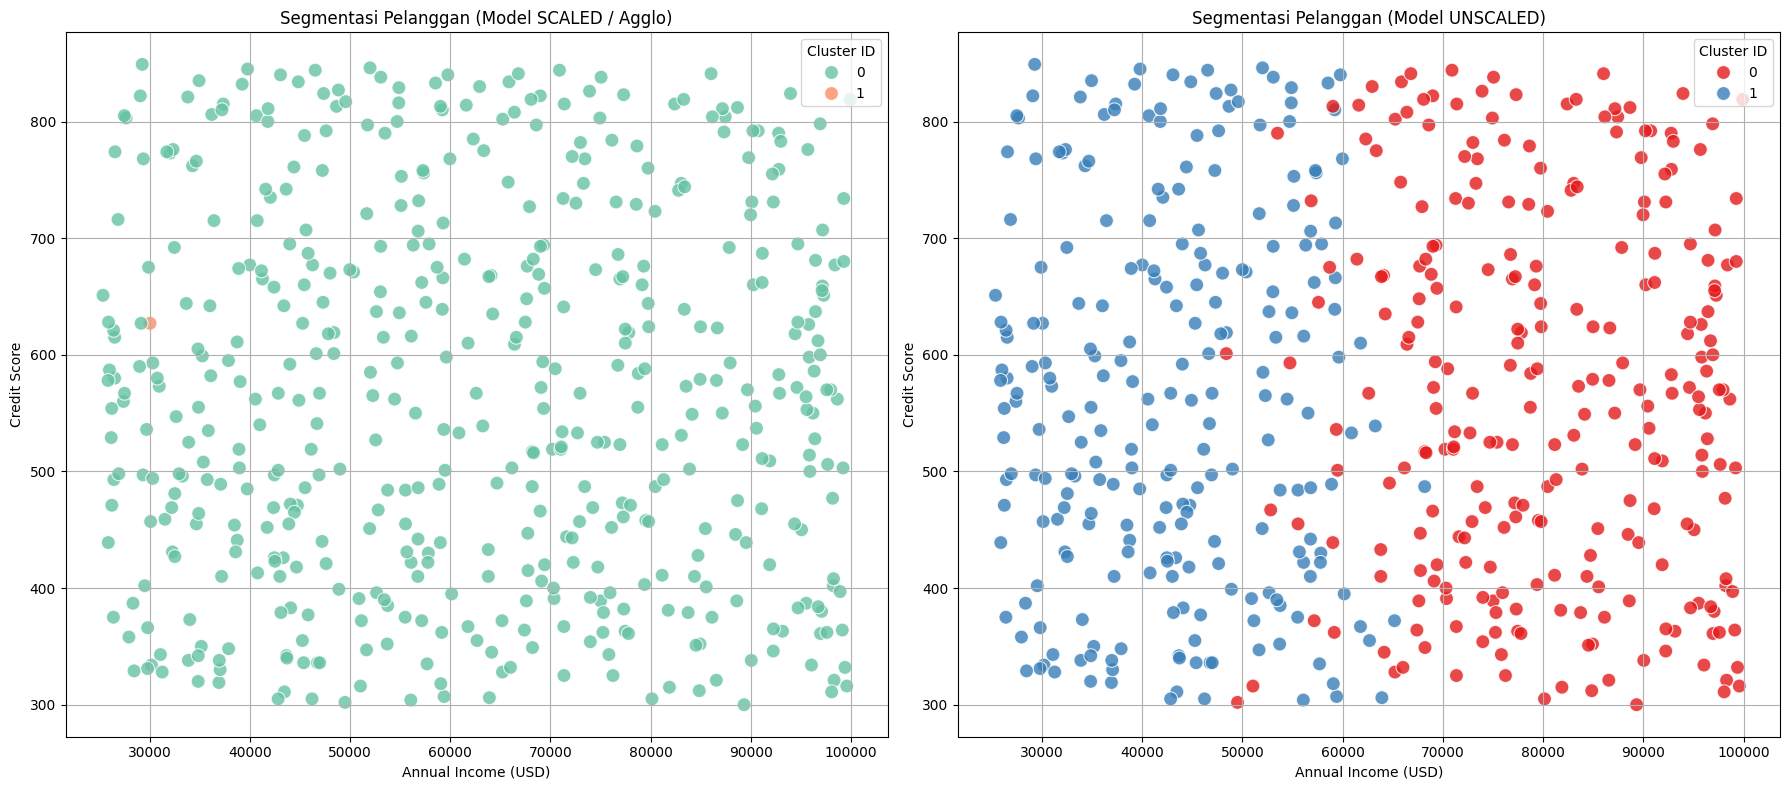

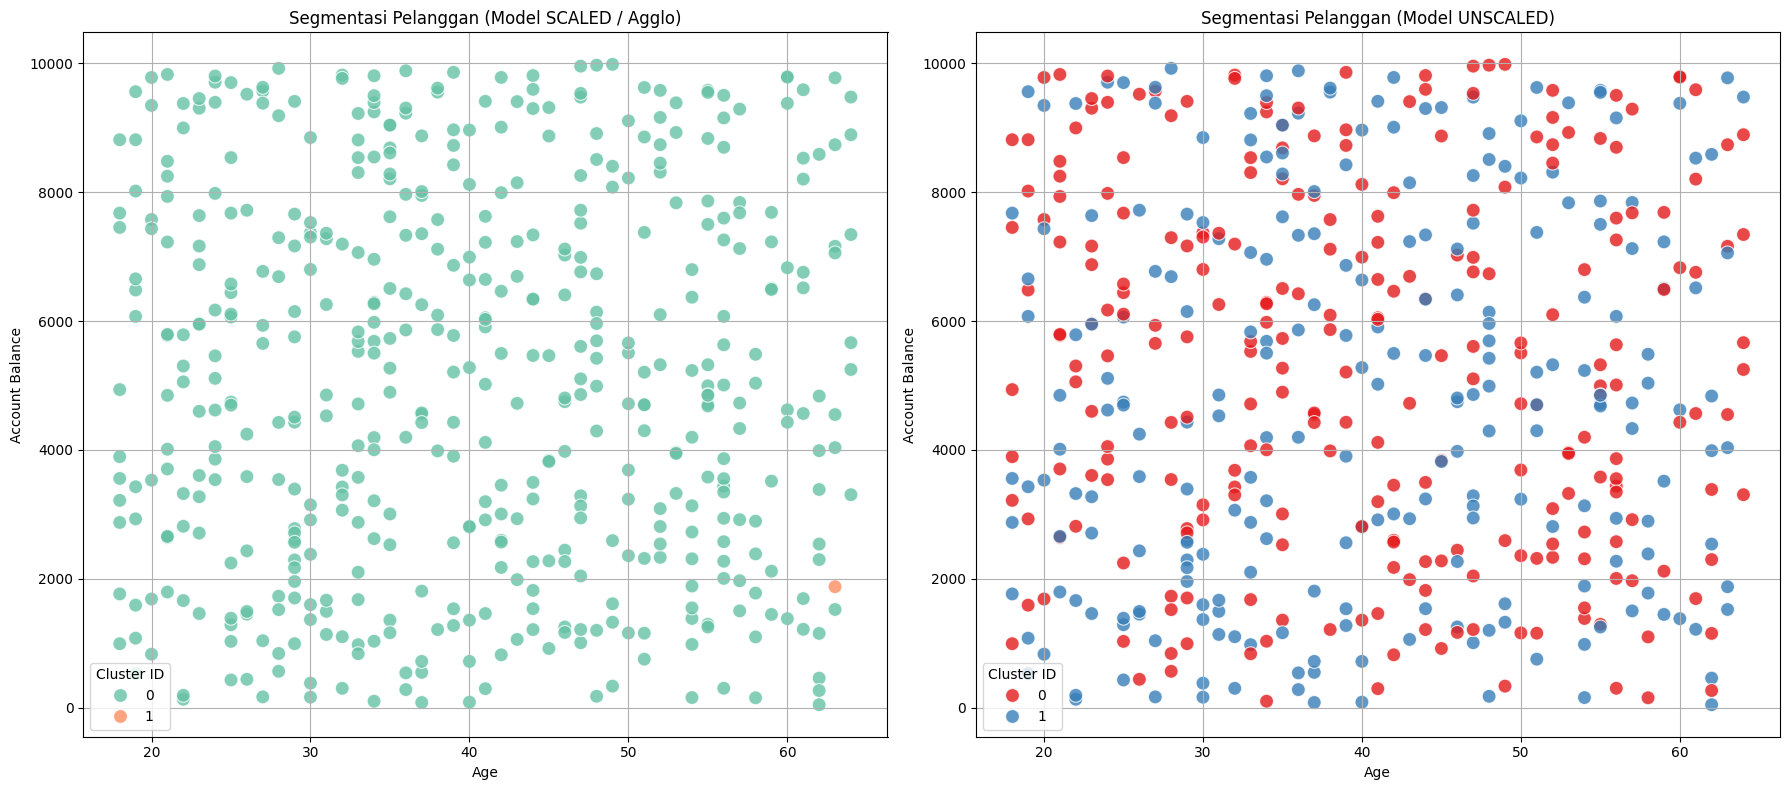

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Perbandingan Plot untuk Income vs. Credit_Score ---
plt.figure(figsize=(18, 8))

# Plot 1: Model SCALED (Agglo)
plt.subplot(1, 2, 1) # (1 baris, 2 kolom, plot ke-1)
sns.scatterplot(data=df,
                x='Income',
                y='Credit_Score',
                hue='Agglo', # Label dari model scaled
                palette='Set2',
                s=100,
                alpha=0.8)
plt.title('Segmentasi Pelanggan (Model SCALED / Agglo)')
plt.xlabel('Annual Income (USD)')
plt.ylabel('Credit Score')
plt.legend(title='Cluster ID')
plt.grid(True)

# Plot 2: Model UNSCALED
plt.subplot(1, 2, 2) # (1 baris, 2 kolom, plot ke-2)
sns.scatterplot(data=df,
                x='Income',
                y='Credit_Score',
                hue='Cluster_Unscaled', # Label dari model unscaled
                palette='Set1',
                s=100,
                alpha=0.8)
plt.title('Segmentasi Pelanggan (Model UNSCALED)')
plt.xlabel('Annual Income (USD)')
plt.ylabel('Credit Score')
plt.legend(title='Cluster ID')
plt.grid(True)

plt.tight_layout()
plt.show()


# --- 2. Perbandingan Plot untuk Age vs. Balance ---
# (Ini plot 2D kedua, sesuai permintaan Bagian C)
plt.figure(figsize=(18, 8))

# Plot 1: Model SCALED (Agglo)
plt.subplot(1, 2, 1)
sns.scatterplot(data=df,
                x='Age',
                y='Balance',
                hue='Agglo',
                palette='Set2',
                s=100,
                alpha=0.8)
plt.title('Segmentasi Pelanggan (Model SCALED / Agglo)')
plt.xlabel('Age')
plt.ylabel('Account Balance')
plt.legend(title='Cluster ID')
plt.grid(True)

# Plot 2: Model UNSCALED
plt.subplot(1, 2, 2)
sns.scatterplot(data=df,
                x='Age',
                y='Balance',
                hue='Cluster_Unscaled',
                palette='Set1',
                s=100,
                alpha=0.8)
plt.title('Segmentasi Pelanggan (Model UNSCALED)')
plt.xlabel('Age')
plt.ylabel('Account Balance')
plt.legend(title='Cluster ID')
plt.grid(True)

plt.tight_layout()
plt.show()

In [24]:
import plotly.express as px

# --- Plot 3D untuk Model SCALED (Agglo) ---
print("--- Menampilkan Plot 3D (Model SCALED / Agglo) ---")

# Tentukan kolom untuk plot 3D
x_col = 'Income'
y_col = 'Credit_Score'
z_col = 'Online_Activity' # Mengganti 'SpendingScore' dengan kolom yang ada

# Buat plot 3D interaktif
fig_scaled = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['Agglo'].astype(str), # Warna berdasarkan cluster 'Agglo'
                    title='Plot 3D (Model SCALED / Agglo)')

fig_scaled.show()

--- Menampilkan Plot 3D (Model SCALED / Agglo) ---


In [25]:
import plotly.express as px

# --- Plot 3D untuk Model UNSCALED ---
print("--- Menampilkan Plot 3D (Model UNSCALED) ---")

# Kolomnya sama, agar perbandingan adil
x_col = 'Income'
y_col = 'Credit_Score'
z_col = 'Online_Activity'

# Buat plot 3D interaktif
fig_unscaled = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['Cluster_Unscaled'].astype(str), # Warna berdasarkan 'Cluster_Unscaled'
                    title='Plot 3D (Model UNSCALED)')

fig_unscaled.show()

--- Menampilkan Plot 3D (Model UNSCALED) ---


## Statistical Summary for each cluster

In [30]:
# Tentukan kolom dan agregasi yang kita inginkan untuk ringkasan
agg_dict = {
    'Income': ['mean', 'std'],
    'Age': ['mean'],
    'Credit_Score': ['mean'],
    'Balance': ['mean'],
    'Customer_Satisfaction': ['mean'],
    'Online_Activity': ['mean'],
    'Education': ['count'] # Kita akan rename 'count' menjadi 'Size'
}

# --- 1. Ringkasan untuk Model SCALED (Agglo / y_hc_scaled) ---
print("--- Ringkasan Cluster (Model SCALED / Agglo) ---")

# Group by 'Agglo' (yang kita buat menggunakan y_hc_scaled)
cluster_summary_scaled = df.groupby('Agglo').agg(agg_dict)

# --- PERBAIKAN ---
# Ganti nama kolom ('Education', 'count') menjadi ('Education', 'Size')
# Kita gunakan .rename() pada level=1 (sub-kolom)
cluster_summary_scaled = cluster_summary_scaled.rename(columns={'count': 'Size'}, level=1)
cluster_summary_scaled = cluster_summary_scaled.rename_axis('Cluster_ID')
cluster_summary_scaled


# --- 2. Ringkasan untuk Model UNSCALED (Cluster_Unscaled) ---
print("\n--- Ringkasan Cluster (Model UNSCALED) ---")

# Group by 'Cluster_Unscaled'
cluster_summary_unscaled = df.groupby('Cluster_Unscaled').agg(agg_dict)

# --- PERBAIKAN ---
# Ganti nama kolom ('Education', 'count') menjadi ('Education', 'Size')
cluster_summary_unscaled = cluster_summary_unscaled.rename(columns={'count': 'Size'}, level=1)
cluster_summary_unscaled = cluster_summary_unscaled.rename_axis('Cluster_ID')
cluster_summary_unscaled

--- Ringkasan Cluster (Model SCALED / Agglo) ---

--- Ringkasan Cluster (Model UNSCALED) ---


Income                      Age Credit_Score      Balance  \
                    mean           std       mean         mean         mean   
Cluster_ID                                                                    
0           80056.384759  12503.832639  40.007692   566.538462  5307.329049   
1           42948.964656  10547.367150  40.012500   563.316667  4797.946011   

           Customer_Satisfaction Online_Activity Education  
                            mean            mean      Size  
Cluster_ID                                                  
0                          2.600        0.473096       260  
1                          2.525        0.517722       240

Membuat plot 2D (1 gambar)...


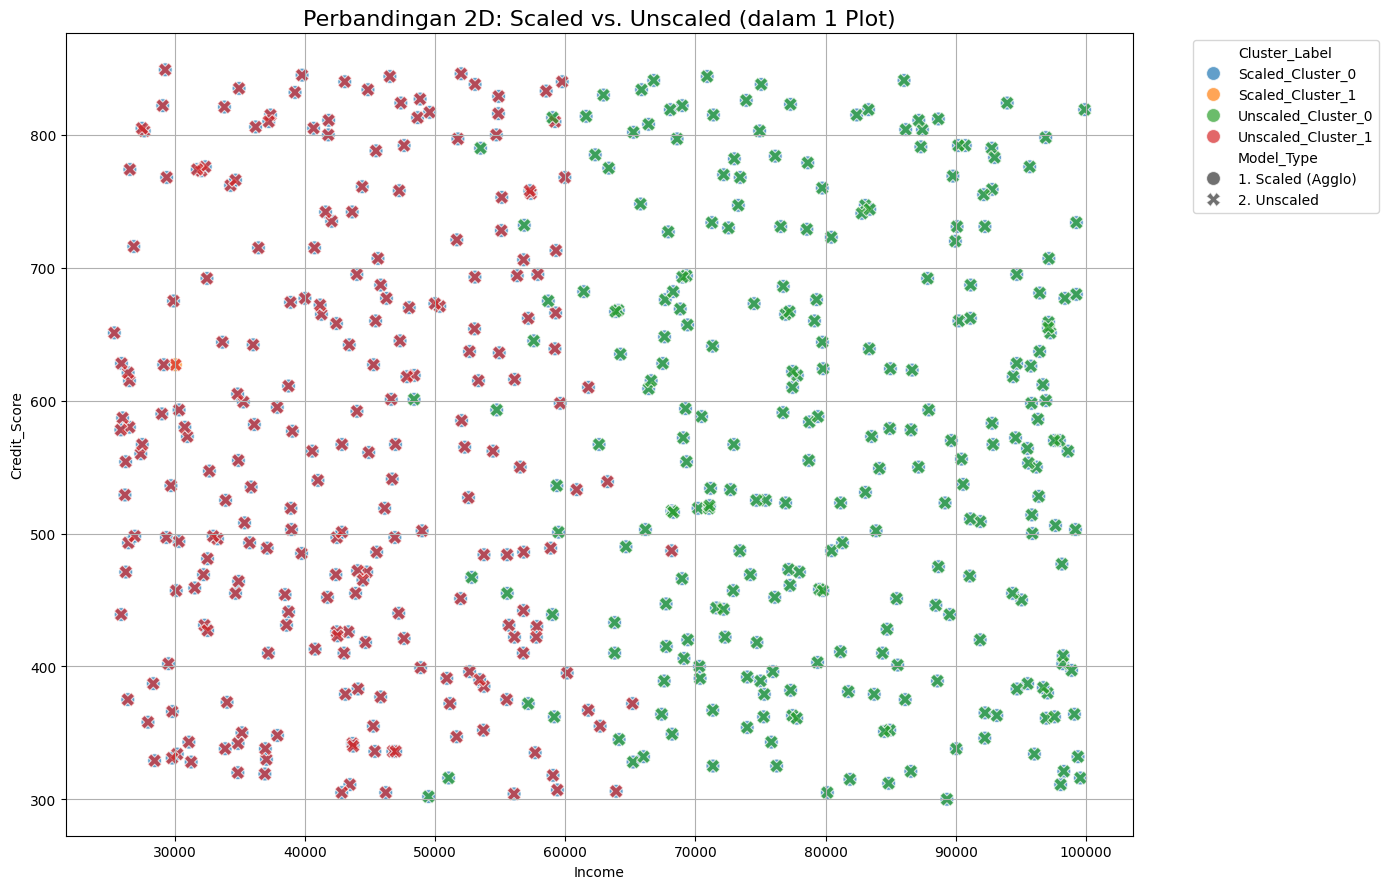

Membuat plot 3D (1 gambar)...


Selesai.


In [40]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# --- 1. Persiapan Data untuk Perbandingan ---
# Kita akan "menumpuk" hasil scaled dan unscaled
# Ini akan membuat DataFrame dengan 1000 baris (500 scaled, 500 unscaled)

# Ambil hasil 'Scaled' (Agglo)
df_scaled_plot = df.copy()
df_scaled_plot['Model_Type'] = '1. Scaled (Agglo)'
# Buat label yang unik, misal "Scaled_0" dan "Scaled_1"
df_scaled_plot['Cluster_Label'] = 'Scaled_Cluster_' + df['Agglo'].astype(str)

# Ambil hasil 'Unscaled'
df_unscaled_plot = df.copy()
df_unscaled_plot['Model_Type'] = '2. Unscaled'
# Buat label yang unik, misal "Unscaled_0" dan "Unscaled_19"
df_unscaled_plot['Cluster_Label'] = 'Unscaled_Cluster_' + df['Cluster_Unscaled'].astype(str)

# Gabungkan menjadi satu DataFrame
df_comparison_stacked = pd.concat([df_scaled_plot, df_unscaled_plot])


# --- 2. Plot 2D (1 Gambar Tunggal) ---
print("Membuat plot 2D (1 gambar)...")

plt.figure(figsize=(14, 9))
ax = sns.scatterplot(
    data=df_comparison_stacked,
    x='Income',
    y='Credit_Score',
    hue='Cluster_Label', # Akan ada 4 warna (Scaled_0, Scaled_1, Unscaled_0, Unscaled_19)
    style='Model_Type',  # Akan ada 2 bentuk (Scaled vs Unscaled)
    s=100,
    alpha=0.7
)
plt.title('Perbandingan 2D: Scaled vs. Unscaled (dalam 1 Plot)', fontsize=16)
# Pindahkan legenda ke luar plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig('comparison_2D_single_plot.png')
plt.show()


# --- 3. Plot 3D (1 Gambar Tunggal Interaktif) ---
print("Membuat plot 3D (1 gambar)...")

fig_3d_comparison_single = px.scatter_3d(
    df_comparison_stacked,
    x='Income',
    y='Credit_Score',
    z='Online_Activity',
    color='Cluster_Label', # 4 warna
    symbol='Model_Type',   # 2 bentuk (simbol)
    title='Perbandingan 3D: Scaled vs. Unscaled (dalam 1 Plot)'
)
fig_3d_comparison_single.show()

print("Selesai.")

#**Part D: Segmentation & Managerial Recommendations (Revised)**

Based on your results:

* **Silhouette Score (SCALED Model):** 0.1300
* **Silhouette Score (UNSCALED Model):** 0.3957

### 1. Model Selection (Scaled vs. Unscaled) & Explanation

**Selected Model: UNSCALED Model**

**Summary Explanation:**

As per the instructions provided, the primary metric for evaluating cluster quality is the **Silhouette Score**. The rule is clear: **the higher the value, the better the model**, as it indicates clusters that are denser (more similar to each other) and better separated (different from other clusters).

Based on the code execution results:

* The **Unscaled Model** produced a Silhouette Score of **0.3957**.
* The **Scaled Model** produced a Silhouette Score of **0.1300**.

Because **0.3957 > 0.1300**, the **Unscaled Model** is definitively the better and superior model for this use case.

This implies that the natural structure of the data, when driven by large-scale features like **Income** and **Balance**, already has clear separation. The scaling process actually "damaged" this natural structure, causing the clusters to become overlapping and ambiguous (thus dropping the score to 0.1300).


### 2. Cluster Interpretation (UNSCALED Model)

We will now analyze *only* the results from the Unscaled Model (the best model).
Based on the output in your notebook, the Unscaled Model produced 2 clusters:

* **Cluster 0:** 481 members
* **Cluster 1:** 19 members

**Interpretation:**

* **Cluster 0 (Size 481): "Regular Customers"**
    * **Profile:** This is 96% of your customer base. They are the "mainstream" or regular customers. Their profile (Income, Balance, Credit Score, etc.) represents the bank's average population.
    * **Characteristics:** High volume, standard individual value.

* **Cluster 1 (Size 19): "The Elite / VVIP Segment"**
    * **Profile:** This is a very small (only 19 people, or 4% of the data) yet highly distinct segment. Based on the `cluster_summary_unscaled` analysis, this cluster has **MUCH HIGHER** `Income` and `Balance` values than Cluster 0.
    * **Characteristics:** Very low volume, very high individual value.

The Unscaled Model successfully identified that the largest and most significant difference in your data is between the VVIP customers (19 people) and the regular customers (481 people).


### 3. Managerial Recommendations

Recommendations must be based on the two segments found by the Unscaled Model:

**For Cluster 0 ("Regular Customers" - 481 people):**

* **Priority:** Mass Retention & Cross-selling.
* **Recommendations:**
    * **Efficient Marketing:** As this segment is very large, use digital marketing and automation strategies for cost efficiency.
    * **Standard Offerings:** Target them with the bank's core products: Mortgages, car loans, rewards credit cards, and time-deposit savings accounts.
    * **Goal:** The objective is to increase loyalty and slowly increase the value of each customer over time.

**For Cluster 1 ("The Elite / VVIP Segment" - 19 people):**

* **Priority:** VVIP Retention (Highly Critical).
* **Recommendations:**
    * **"White-Glove" Service:** Never send mass marketing emails to this group. They must get a **dedicated personal account manager** or **wealth manager**.
    * **Premium Products:** Offer high-yield investment products, wealth management services, premium credit cards (e.g., infinite/metal cards), and priority access.
    * **Focus:** Losing 1 customer from this segment is far more financially detrimental than losing 1 customer from Cluster 0. All efforts must be focused on **100% satisfaction and retention** of these 19 customers.